In [3]:
import pandas as pd
year18 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2018 - FB.csv")
year19 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2019 - FB.csv")
year21 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2021 - FB.csv")
year22 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2022 - FB.csv")
columns = ['PANCAKE', 'SACKS ALLOWED',
                                    'AGE',
                                    'SPEED', 'ACCELERATION', 'STRENGTH', 'AWARENESS',
                                    'AGILITY', 'CATCH', 'JUMP', 'BREAK TACKLE', 'TACKLE', 'PASS BLOCK', 'RUN BLOCK', 'STAMINA', 'TOUGHNESS', 'PLAYER EGO', 'WGT', 'HGTIN',
                                    'RECEIVING','BLOCKING','BALANCED','RUN BLOCKER','ROAD BLOCKER','FAN FAVORITE','TEAM MENTOR',
                                    'TEAM LEADER','NONE']

rawData = [year18,year19,year21,year22]
dfs = []
for rd in rawData:
    df = pd.DataFrame(rd,columns=columns)
    df = df.dropna(subset=['PANCAKE'])
    df = df[~(df['PANCAKE'] <= 10)]
    df['HGTIN'] = df['HGTIN'].astype(float)
    dfs.append(df)
all_years = pd.concat(dfs)
correlation_matrix = all_years.corr()

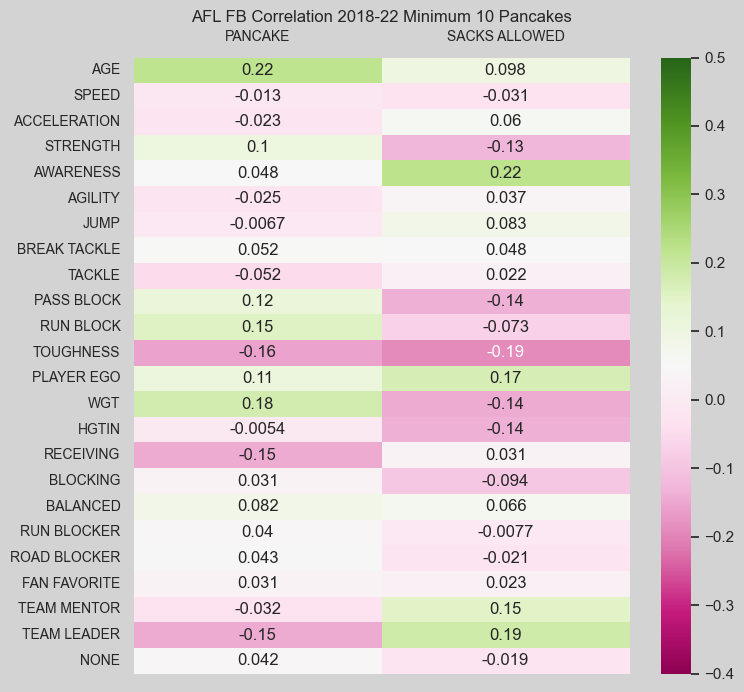

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
rows = ['AGE','SPEED', 'ACCELERATION', 'STRENGTH', 'AWARENESS',
        'AGILITY', 'JUMP', 'BREAK TACKLE', 'TACKLE',
        'PASS BLOCK', 'RUN BLOCK', 'TOUGHNESS', 'PLAYER EGO', 'WGT', 'HGTIN',
        'RECEIVING','BLOCKING','BALANCED','RUN BLOCKER','ROAD BLOCKER','FAN FAVORITE','TEAM MENTOR',
                                    'TEAM LEADER','NONE']
cols = ['PANCAKE', 'SACKS ALLOWED']
sns.set(rc={'figure.facecolor':'lightgrey'})
sns.heatmap(correlation_matrix.loc[rows,cols], annot=True, cmap='PiYG', vmin=-.4,vmax=.5)
plt.title("AFL FB Correlation 2018-22 Minimum 10 Pancakes")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom = False, top = False, labeltop = True)
plt.show()